Import required Libraries

In [ ]:
import matplotlib.pyplot as plt

In this code, the data was captured using matlab mobile then the data was copied and pasted into two .txt files one containing the time stamps and another containing the acceleration data. So first we will have to read data from the files and organize the data.

In [ ]:
#read the time stamp file
file1 = open('accel data time stamp.txt', 'r')
Lines = file1.readlines() 
time_stamps = [0]

for line in Lines:
    time_stamps.append(float(line.strip()))


Now that we have the time stamps in a list, we will similarly read and store the acceleration in x, y, and z in three seperate lists.

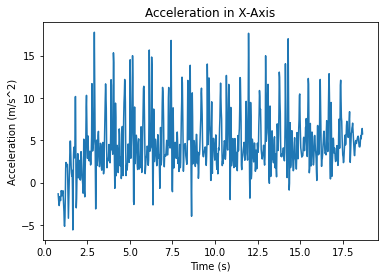

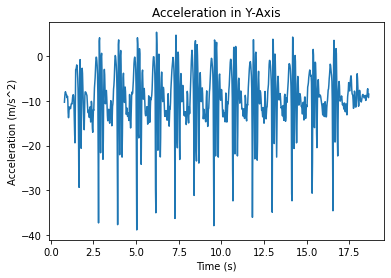

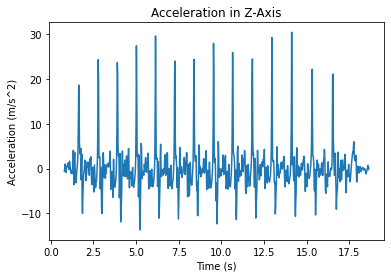

In [ ]:
#Initialize lists to store data
accel = [] #this temporary list will store the raw lines as read from the txt file in form of a list, each line will be an element of the list
accel_x = [] #this will store final acceleration in x-axis in float data type 
accel_y = [] #this will store final acceleration in y-axis in float data type
accel_z = [] #this will store final acceleration in z-axis in float data type

file1 = open('accel data.txt', 'r')
Lines = file1.readlines() 
for line in Lines:
    accel.append(line.strip())


acceleration = [] #another temporary list to store seperated x,y,z data from accel list
for i in accel:
    i = i.split(" ")
    i.remove("")
    acceleration.append(i)

#as there are some empty string in the list we will remove them
for i in acceleration:
    while "" in i:
		    i.remove("")

#now we will seperae x, y, and z accelration and save them in different lists as float
for i in acceleration:
	  accel_x.append(float(i[0]))
	  accel_y.append(float(i[1]))
	  accel_z.append(float(i[2]))

accel_x = accel_x[40 : len(accel_x) - 100]
accel_y = accel_y[40 : len(accel_y) - 100]
accel_z = accel_z[40 : len(accel_z) - 100]
time_stamps = time_stamps[40 : len(time_stamps) - 100]

plt.title("Acceleration in X-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, accel_x)
plt.show()

plt.title("Acceleration in Y-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, accel_y)
plt.show()

plt.title("Acceleration in Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, accel_z)
plt.show()

As we can see that the graphs hve a lot of peaks so peak detection will not work very well on this graph. So we will apply moving average to smoothe the graph before detecting the peaks.

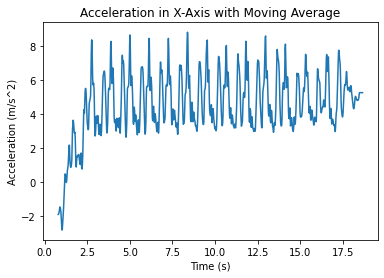

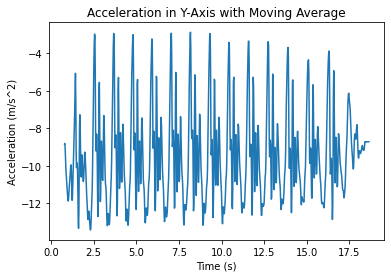

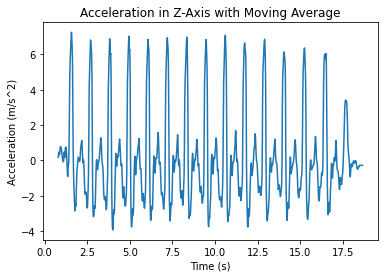

In [ ]:
#Moving average on X-Axis acceleration
moving_avg_x = []
neighbour_size = 10
i = 0
while i < len(accel_x) - neighbour_size + 1:
    neighbours = accel_x[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    moving_avg_x.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	moving_avg_x.append(moving_avg_x[len(moving_avg_x) - 1])
 
plt.title("Acceleration in X-Axis with Moving Average")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, moving_avg_x)
plt.show()


#Moving average on Y-Axis acceleration
moving_avg_y = []
neighbour_size = 10
i = 0
while i < len(accel_y) - neighbour_size + 1:
    neighbours = accel_y[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    moving_avg_y.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	moving_avg_y.append(moving_avg_y[len(moving_avg_y) - 1])

plt.title("Acceleration in Y-Axis with Moving Average")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, moving_avg_y)
plt.show()


#Moving average on Z-Axis acceleration
moving_avg_z = []
neighbour_size = 10
i = 0
while i < len(accel_z) - neighbour_size + 1:
    neighbours = accel_z[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    moving_avg_z.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	moving_avg_z.append(moving_avg_z[len(moving_avg_z) - 1])
 
plt.title("Acceleration in Z-Axis with Moving Average")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, moving_avg_z)
plt.show()


As we can see that the peaks in Z-axis acceleration are most clear and dominant so they will be easier to detect and each peak corresponds to the step taken from the leg in which the phone is kept, so the next step will be taken from other leg and no peak will be shown. Thus, the total number of steps will be two times the number of peaks.

In this case the peaks in Z-Axis are dominant but it depends on the orientation in which the phone is kept in the pocket so sometimes the dominant peaks will be from another axis. 

To solve this issue all the cmponents x, y, and z are added and stored in another list. This sum will give similar waveform everytime, no matter the orientation of phone in the pocket.

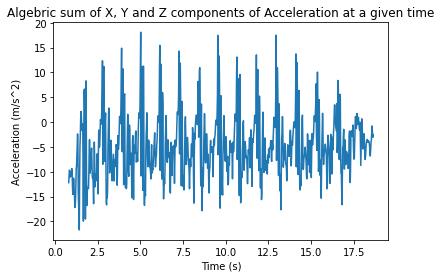

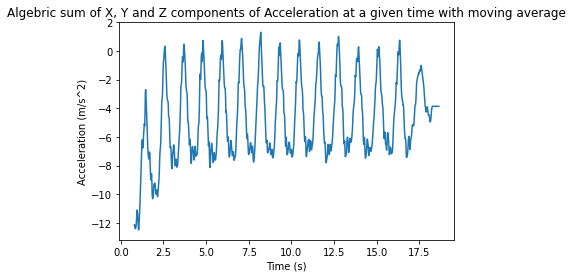

In [ ]:
#list to store algebric sum of all acceleration components 
accel_sum = []

#loop through the list
for i in range(0, len(accel_x)):
  accel_sum.append(accel_x[i] + accel_y[i] + accel_z[i])#add and store to the list

#plot graph
plt.title("Algebric sum of X, Y and Z components of Acceleration at a given time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, accel_sum)
plt.show()

#apply moving average on the new list
moving_avg_all = []
neighbour_size = 20
i = 0
while i < len(accel_sum) - neighbour_size + 1:
    neighbours = accel_sum[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    moving_avg_all.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	moving_avg_all.append(moving_avg_all[len(moving_avg_all) - 1])

plt.title("Algebric sum of X, Y and Z components of Acceleration at a given time with moving average")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time_stamps, moving_avg_all)
plt.show()
 

Now we will apply a peak detection algorithm to determine and count the number of peaks in the graph. It works by taking a sample of 5 consecutive data points and then compares the middle one with others. If [p1, p2, p3, p4, p5] are the data points then it checks for the condition: p1< p2 < p3 > p4 > p5.

If this is satisfyed then the middle point is considered as a peak. Similarly the window moves forward through the list to check for all the points.

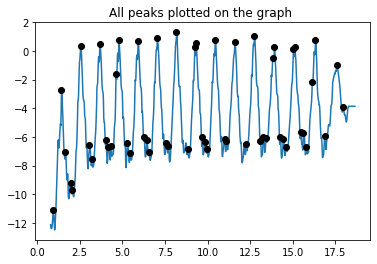

In [159]:
#peak detection
index = 0 #counter variable
maxima = [] #peak points will be stored in this list
maxima_index = [] #time stamp of peak points will be stored in this list
#LOOP THROUGH THE DATA POINTS
while True:
    if index + 4 < len(moving_avg_all):
        #TAKE 5 CONSEQUTIVE DATA POINTS AS LEFT_LEFT, LEFT,MID, RIGHT, RIGHT_RIGHT
        left_left = moving_avg_all[index]
        left = moving_avg_all[index + 1]
        mid = moving_avg_all[index + 2]
        right = moving_avg_all[index + 3]
        right_right = moving_avg_all[index + 4]
        #MIDDLE ONE SHOULD BE THE SMALLEST AND FIRST AND THE LAST TO BE THE GREATEST, ONLY THEN THE MIDDLE POINT IS A MINIMA
        if (left_left < left) and (left < mid) and (right < mid) and (right_right < right):
            #IF THE CONDITION IS SATISFYED THEN APPEND MINIMA TO LIST
            maxima_index.append(time_stamps[index + 1])
            maxima.append(mid)

    if index >= len(moving_avg_all):#To avoid list index out of range error, break the loop when list ends
        break
    index += 1 #increment counter variable

#plot the peaks detected
plt.plot(time_stamps, moving_avg_all)
plt.title("All peaks plotted on the graph ")
plt.plot(maxima_index, maxima, 'o', color='black')
plt.show() 


Here as we can see that a lot of unwanted peaks from the bottom of the graph are captured as the graph is not smoothe enough, so we will have to filter them out. 

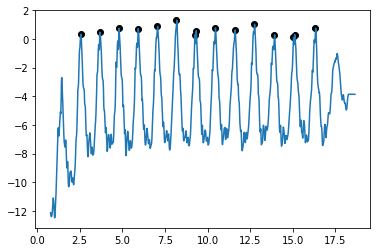

In [160]:
#Remove unwanted peaks
maxima_filtered = [] #new peaks will be stored here
maxima_filtered_time = [] #time stamp of new peaks will be stored here

index=0 #counter variable
for i in maxima: #loop through peaks
  if i >= 0: #if peak is higher than specified value then add it to new list
    maxima_filtered.append(i)
    maxima_filtered_time.append(maxima_index[index])
  index += 1

#plot peaks after filtering unwanted ones
plt.plot(maxima_filtered_time, maxima_filtered, 'o', color='black')
plt.plot(time_stamps, moving_avg_all)

Now the number of steps=number of maximas * 2

In [161]:
no_of_steps = len(maxima_filtered) * 2
print("Number of steps = ", no_of_steps)

Number of steps =  30


Here Actual number of steps was 32 so the program's calculation is close to the actual value.

Written by:

Nisarg Panchal (19bee070@nirmauni.ac.in)

Nirma University

Electrical Engineering 2019-2023